In [64]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import imghdr
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix , classification_report


In [67]:
data_dir='Training_data'#name of the folder contain the images 

In [68]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [69]:
#os.listdir(os.path.join(data_dir,'black'))

In [70]:
img=cv2.imread(os.path.join(data_dir,'black','0a0502.png'))

In [71]:
img.shape

(200, 150, 3)

In [72]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
#to verify if there is a picture that don't have the extension bellow
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image Training_data\pink\.ipynb_checkpoints


In [73]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 282 files belonging to 12 classes.


In [74]:
data_iterator = data.as_numpy_iterator() 
#allow us to acesse to our data
data_iterator

In [75]:
batch=data_iterator.next()#each run it come a new batch

len(batch)#1:image representation ,2 label

In [76]:
len(batch[0])

32

In [77]:
#tf.keras.utils.image_dataset_from_directory?? #help

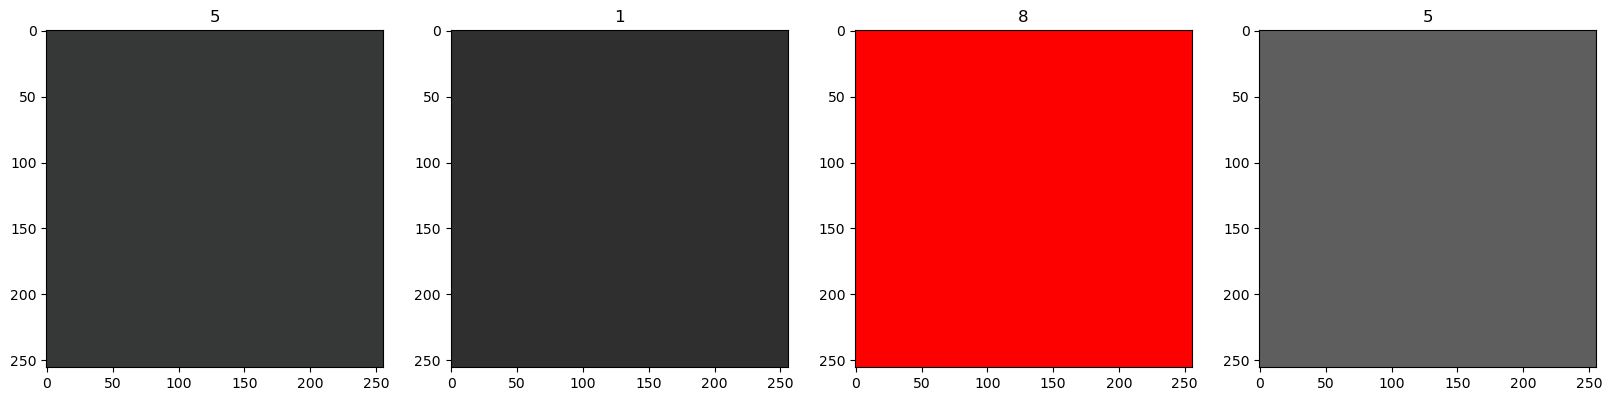

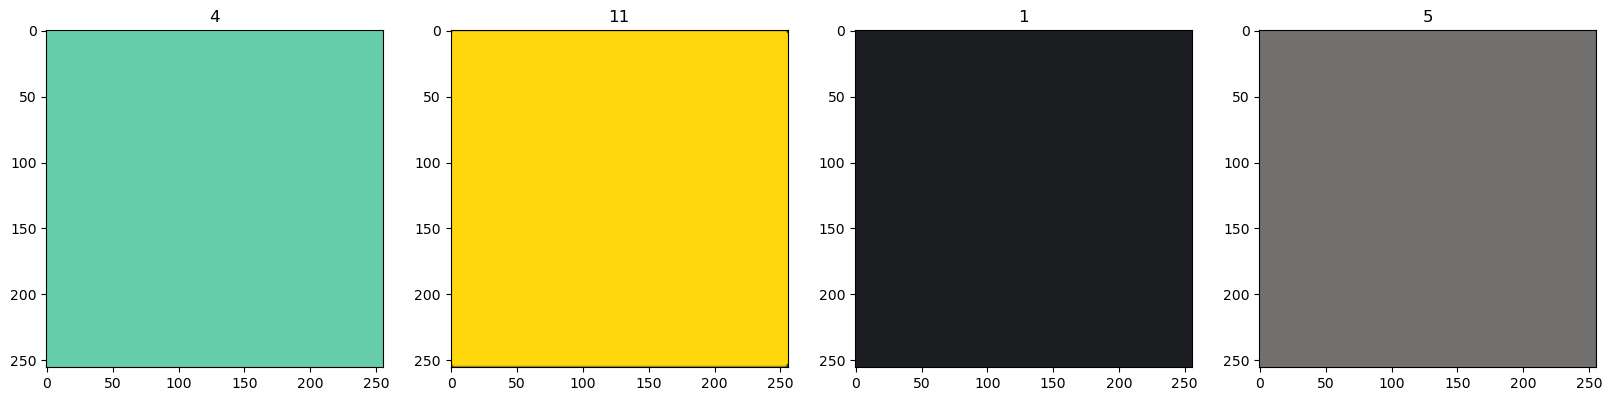

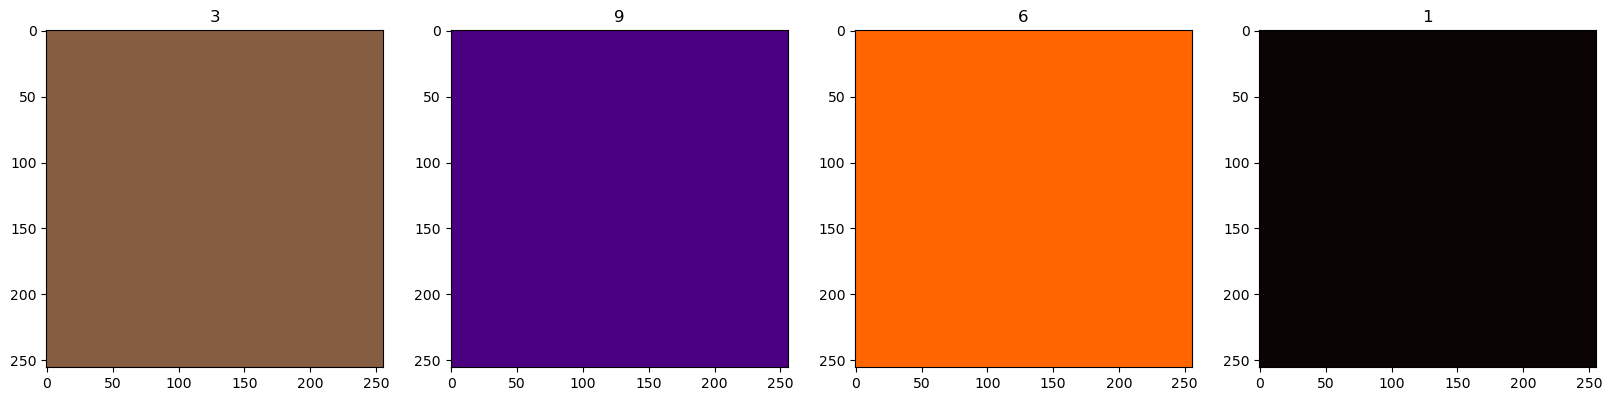

In [78]:
for i in range (3):
    batch=data_iterator.next()
    
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])
        
    
    


In [80]:
scaleddata = data.map(lambda x,y: (x/255, y))
scaled_iterator = scaleddata.as_numpy_iterator() 


(256, 256, 3)

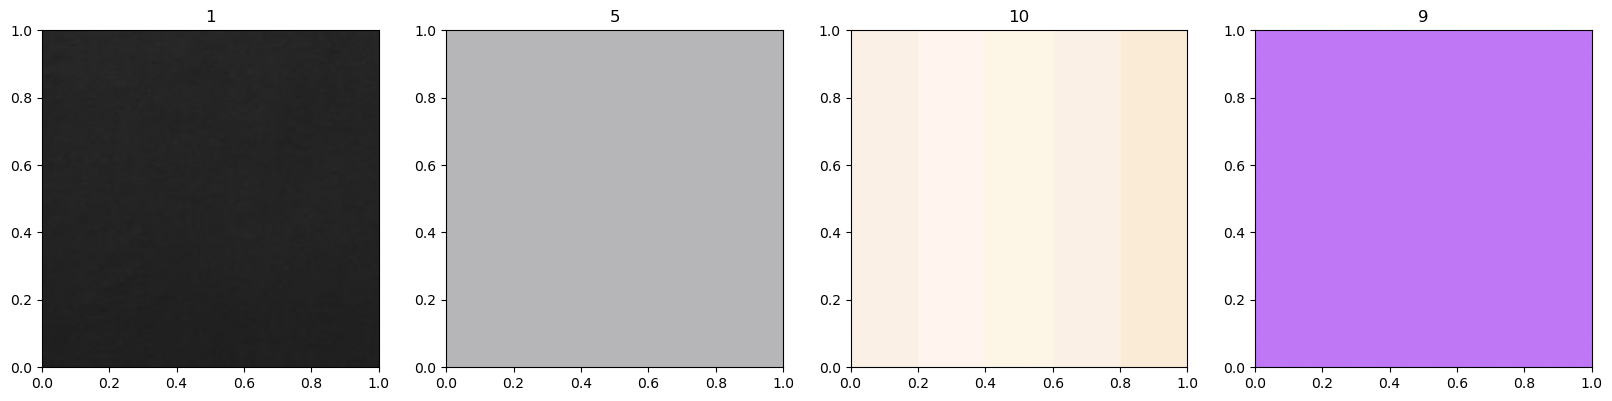

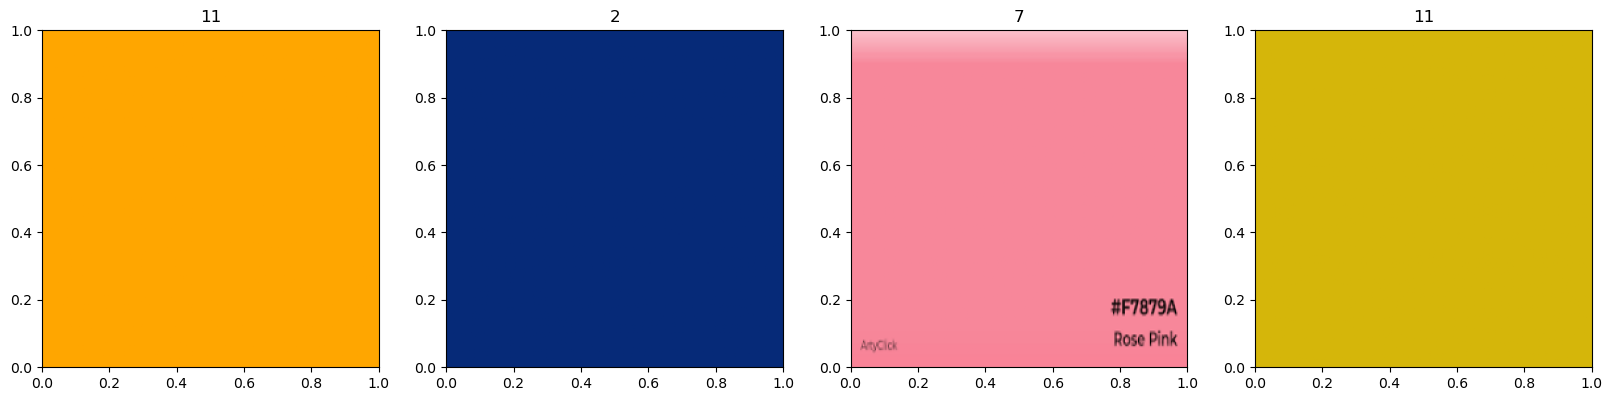

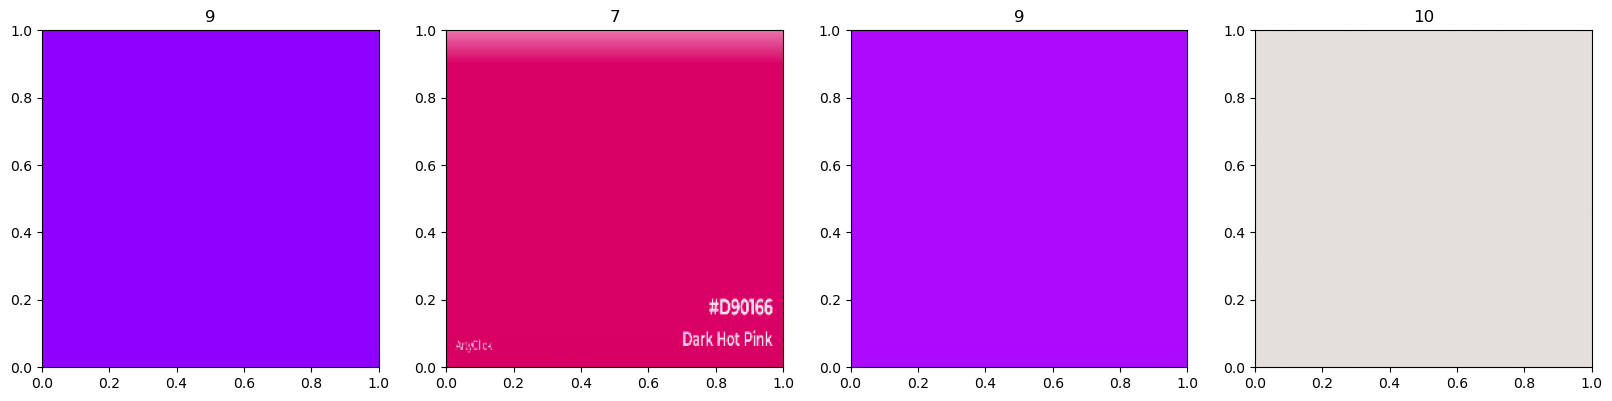

In [81]:
for i in range (3):
    batch=scaleddata.as_numpy_iterator().next()
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img,extent=[0, 1, 0, 1])
        ax[idx].title.set_text(batch[1][idx])
img.shape

In [82]:
len(data)

9

In [83]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [84]:
train_size = int(len(scaleddata)*.7) #train deep learning model
val_size = int(len(scaleddata)*.1)+1 #evaluating model
test_size = int(len(scaleddata)*.2)+1 #hold to test

In [85]:
print(train_size)
print(val_size)
print(test_size)
train_size+val_size+test_size

6
1
2


9

In [86]:
train = scaleddata.take(train_size) #how much data you will take in this particular data
val = scaleddata.skip(train_size).take(val_size)
test = scaleddata.skip(train_size+val_size).take(test_size)

In [87]:
type(train)

tensorflow.python.data.ops.take_op._TakeDataset

In [88]:
def datatoXYtrain(x):
    # Assuming your dataset is stored in the variable 'dataset'

    # Initialize lists to store the first and second tensors from all batches
    X_train = []
    Y_train = []

    # Iterate through the dataset and collect the tensors from each batch
    for batch in x:
        first_tensor, second_tensor = batch
        X_train.append(first_tensor)
        Y_train.append(second_tensor)

    # Convert the lists of tensors to arrays (optional, if you want to work with numpy arrays)
    import numpy as np
    X_train = np.concatenate(X_train, axis=0)
    Y_train = np.concatenate(Y_train, axis=0)
    return X_train,Y_train

    # Now you can work with 'first_tensors' and 'second_tensors' containing all the data
X_train,Y_train=datatoXYtrain(train)
X_test,Y_test=datatoXYtrain(test)
X_val,Y_val=datatoXYtrain(val)

In [89]:
Y_test

array([ 2,  7, 10,  6,  2,  5,  2, 10, 10,  6, 11, 10, 10, 10,  2,  3,  1,
        2, 11, 10,  9,  9,  6,  7,  4,  8,  1,  4,  1,  3,  4,  7,  6,  8,
       10,  2,  6, 10, 11, 11,  8,  5,  7,  6,  3,  4,  6, 10,  2,  7,  5,
        1,  2,  1,  6, 10,  9,  4])

In [90]:
Y_train

array([11,  3,  3, 10,  8,  7,  6,  5,  1,  6, 11,  8,  8,  9, 10,  7,  9,
        2,  6,  5,  1,  9, 10,  8,  7, 10, 10,  1,  1,  7,  4,  7,  5,  4,
       10,  2,  8, 10,  2,  4,  3,  6, 11,  5,  2,  2,  9,  6,  6, 11,  4,
        6,  9,  5,  6,  6,  3,  8,  7, 10, 11,  8, 11,  4, 10, 10,  8,  2,
        3,  9,  3,  9,  2, 11,  6,  8,  7,  2,  2,  4,  4,  6,  5,  3,  9,
        7,  3,  9,  5,  5,  1,  6,  1,  5,  3,  9,  6,  8,  6,  6,  7,  3,
        7,  8, 10,  5, 10, 11,  6, 10, 11, 11, 11,  8, 10,  9,  4,  7,  7,
        3,  1, 11,  2, 11,  7,  5,  7,  9,  3, 10,  2,  2,  2,  8,  4,  4,
       10,  4,  7,  5, 11,  3,  4,  2,  7,  2, 11, 11,  1,  6, 11,  7,  7,
        9,  1,  2,  9,  4,  1,  7, 10,  5,  8,  5,  3,  9,  9,  3,  6,  3,
        8,  4,  2,  7,  4,  3,  6,  5,  7,  7,  1,  5,  1,  2,  7,  5,  1,
       11, 10, 10,  7,  9])

In [91]:
classes = ["","Black","Blue","brown","green","grey","orange","pink","red","violet","white","yellow"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
X_train.shape

(192, 256, 256, 3)

In [92]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(12, activation='softmax')
])


In [93]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
X_train.shape
#model.fit(X_train, Y_train, epochs=5)


(192, 256, 256, 3)

In [95]:
cnn.fit(X_train, Y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 6s 818ms/step - loss: 5.1862 - accuracy: 0.1302
Epoch 2/50
6/6 [==============================] - 6s 1s/step - loss: 1.5772 - accuracy: 0.4531
Epoch 3/50
6/6 [==============================] - 5s 898ms/step - loss: 1.0141 - accuracy: 0.6510
Epoch 4/50
6/6 [==============================] - 5s 844ms/step - loss: 0.6165 - accuracy: 0.7500
Epoch 5/50
6/6 [==============================] - 6s 1s/step - loss: 0.3812 - accuracy: 0.8646
Epoch 6/50
6/6 [==============================] - 5s 826ms/step - loss: 0.2893 - accuracy: 0.9062
Epoch 7/50
6/6 [==============================] - 5s 815ms/step - loss: 0.2495 - accuracy: 0.9271
Epoch 8/50
6/6 [==============================] - 6s 957ms/step - loss: 0.2865 - accuracy: 0.8906
Epoch 9/50
6/6 [==============================] - 5s 789ms/step - loss: 0.2062 - accuracy: 0.9271
Epoch 10/50
6/6 [==============================] - 5s 798ms/step - loss: 0.1531 - accuracy: 0.9479
Epoch 11/50
6/6 [========

In [96]:
cnn.evaluate(X_test,Y_test)


2/2 [==============================] - 0s 147ms/step - loss: 0.0625 - accuracy: 1.0000


[0.06252104789018631, 1.0]

In [97]:
y_pred = cnn.predict(X_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:5])
print(Y_test[:5])


2/2 [==============================] - 0s 142ms/step
[2, 7, 10, 6, 2]
[ 2  7 10  6  2]


orange


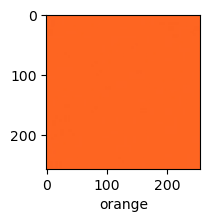

In [99]:
a=np.random.randint(58)
plot_sample(X_test, Y_test, a)
print(classes[y_classes[a]])

In [100]:


# Function to preprocess the input image to test any image if you want
def preprocess_image(image_path, target_size):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image to the target size
    image = cv2.resize(image, (target_size[0], target_size[1]))
    # Normalize the pixel values to the range [0, 1]
    image = image.astype('float32') / 255.0
    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    return image

# Define the target size of the input image (must match the input shape of your CNN model)
target_size = (256, 256, 3)  # Adjust this based on your model's input shape

# Path to the image you want to predict
image_path = os.path.join('pinkawi.jpg') 

# Preprocess the input image
preprocessed_image = preprocess_image(image_path, target_size)

# Make predictions using the model
predictions = cnn.predict(preprocessed_image)

# Since you are predicting colors, the output may be a probability distribution
# You can use argmax to get the index of the highest probability as the predicted color
predicted_color_index = np.argmax(predictions[0])

# Get the predicted color label
predicted_color = classes[predicted_color_index]

print(f"The predicted color of the input image is: {predicted_color}")


1/1 [==============================] - 0s 28ms/step
The predicted color of the input image is: pink


In [ ]:
# Define a global variable to store the captured image region
captured_region = None

def capture_image_region(image_path):
    global captured_region

    # Load the image
    image = cv2.imread(image_path)
    original_image = image.copy()

    # Create a window to display the image
    #cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow("Image", image)

    # Define the coordinates for the region to capture
    top_left = None
    bottom_right = None

    # Function to handle mouse click events
    def mouse_callback(event, x, y, flags, param):
        nonlocal top_left, bottom_right, image

        if event == cv2.EVENT_LBUTTONDOWN:
            # Set the top-left coordinates
            top_left = (x, y)

        elif event == cv2.EVENT_LBUTTONUP:
            # Set the bottom-right coordinates
            bottom_right = (x, y)

            # Draw a rectangle to show the selected region on the image
            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
            cv2.imshow("Image", image)

            # Capture the selected region and store it in the global variable
            global captured_region
            captured_region = original_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
            captured_region = cv2.cvtColor(captured_region, cv2.COLOR_BGR2RGB)
    # Set the mouse callback function for the "Image" window
    cv2.setMouseCallback("Image", mouse_callback)

    # Wait until a key is pressed and then close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return captured_region




In [101]:
def final_predection (image_path):
    image_to_predict = capture_image_region(image_path)
    image_to_predict = cv2.resize(image_to_predict, (target_size[0], target_size[1]))
    # Normalize the pixel values to the range [0, 1]
    image_to_predict = image_to_predict.astype('float32') / 255.0
    plt.imshow(image_to_predict)
    image_to_predict = np.expand_dims(image_to_predict, axis=0)
    # Make predictions using the model
    predictions = cnn.predict(image_to_predict)

    # Since you are predicting colors, the output may be a probability distribution
    image_to_predict = np.expand_dims(image_to_predict, axis=0)

    # You can use argmax to get the index of the highest probability as the predicted color
    predicted_color_index = np.argmax(predictions[0])

    # Get the predicted color label
    predicted_color = classes[predicted_color_index]

    print(f"The predicted color of the input image is: {predicted_color}")
    
    


1/1 [==============================] - 0s 36ms/step
The predicted color of the input image is: green


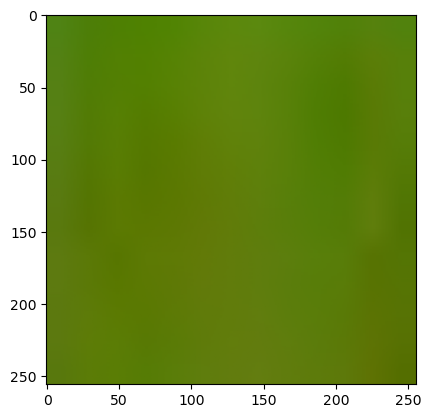

In [103]:
#enter your image as input and select the color you want to predict
final_predection('colorpic.jpg') 